In [1]:
#We will compare absenteeism and graduation rates by demographics for the year 2021. Once this works, we will create absentee and graduate data for all years available and compute it with HPC. 


In [12]:
#pull chronic absenteeism for 2021 by demographics
import pandas as pd

dfAbs21RAW = pd.read_csv("chronicabsenteeism21.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
dfAbs21RAW = dfAbs21RAW[dfAbs21RAW['Aggregate Level'] == "S"]
#df1 = df1[df1['ReportingCategory'] == "GR912"]
dfAbs21RAW = dfAbs21RAW.drop(['Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name','District Name', 'Charter School', 'ChronicAbsenteeismRate'], axis = 1)
dfAbs21RAW = dfAbs21RAW.sort_values(by=['School Name']).dropna()
dfAbs21RAW

,Academic Year,School Name,Reporting Category,ChronicAbsenteeismEligibleCumula,ChronicAbsenteeismCount
139278,2020-21,138th Street,GRK8,443.0,9.0
139260,2020-21,138th Street,GR13,145.0,2.0
139267,2020-21,138th Street,GR46,298.0,7.0
139288,2020-21,138th Street,RA,17.0,0.0
139323,2020-21,138th Street,RH,253.0,5.0
...,...,...,...,...,...
214965,2020-21,one.Charter,GRK8,15.0,1.0
215042,2020-21,one.Charter,SS,847.0,37.0
214961,2020-21,one.Charter,GR912,934.0,40.0
215049,2020-21,one.Charter,TA,949.0,41.0


In [20]:
#Chronic Absenteeism of African American students

dfAbs21RB = dfRawAbs21[dfRawAbs21['Reporting Category'] == 'RB'].dropna()
eligible21RB = dfAbs21RB['ChronicAbsenteeismEligibleCumula'].sum()
chronicAbs21RB = dfAbs21RB['ChronicAbsenteeismCount'].sum()
absRate21RB = chronicAbs21RB/eligible21RB

dfAbs21RB
print(eligible21RB)
print(chronicAbs21RB)
print(absRate21RB)

310867.0
85199.0
0.2740689748348972


In [30]:
#TODO make this a dictionary to call the code or the word

demographicList = [
"RB",
"RI",
"RA",
"RF",
"RH",
"RD",
"RP",
"RT",
"RW",
"GM",
"GF",
"GX",
"SE",
"SD",
"SS",
"SM",
"SF",
"SH",
"GRKN",
"GR13",
"GR46",
"GR78",
"GRK8",
"GR912",
"TA"]

In [ ]:
#going through all years in main chronic absentee data
#for year in allChronicAbsentee['Academic Year'].to_list():


In [32]:
absRateDemoList = []
for demo in demographicList:
    dfAbs21Demo = dfRawAbs21[dfRawAbs21['Reporting Category'] == demo].dropna()
    eligible21Demo = dfAbs21Demo['ChronicAbsenteeismEligibleCumula'].astype(float).sum()
    chronicAbs21Demo = dfAbs21Demo['ChronicAbsenteeismCount'].astype(float).sum()
    absRate21Demo = chronicAbs21Demo/eligible21Demo

    absRateDemoList.append(absRate21Demo)
    
    print("With", chronicAbs21Demo, "absent of a possible", eligible21Demo, "students, the chronic absentee rate of", demo, "is: ", absRate21Demo)

With 85199.0 absent of a possible 310867.0 students, the chronic absentee rate of RB is:  0.2740689748348972
With 4207.0 absent of a possible 13124.0 students, the chronic absentee rate of RI is:  0.3205577567814691
With 21678.0 absent of a possible 573547.0 students, the chronic absentee rate of RA is:  0.037796379372571035
With 4913.0 absent of a possible 126866.0 students, the chronic absentee rate of RF is:  0.03872589976825942
With 599693.0 absent of a possible 3442598.0 students, the chronic absentee rate of RH is:  0.17419780061453588
With 4945.0 absent of a possible 35700.0 students, the chronic absentee rate of RD is:  0.138515406162465
With 2968.0 absent of a possible 11855.0 students, the chronic absentee rate of RP is:  0.25035849852382963
With 25697.0 absent of a possible 242498.0 students, the chronic absentee rate of RT is:  0.10596788427121048
With 139280.0 absent of a possible 1347024.0 students, the chronic absentee rate of RW is:  0.10339830619202034
With 500570.0 ab

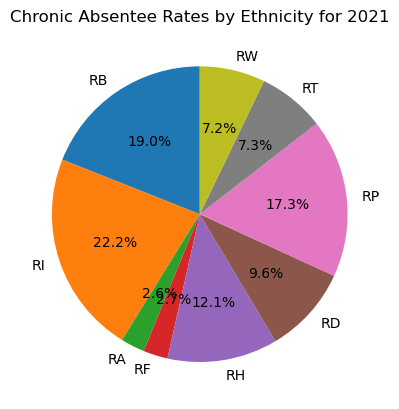

In [44]:
#Visualize the absentee breakdown

import matplotlib.pyplot as plt

#creating the pie chart
plt.pie(absRateDemoList[0:9], labels = demographicList[0:9], autopct='%1.1f%%', startangle=90)
year = 2021
title = "Chronic Absentee Rates by Ethnicity for " + str(year)
plt.title(title) 
plt.show()